In [1]:
# Connect the colab notebook with drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV


In [3]:
dataset =  pd.read_csv("/content/drive/MyDrive/Customer_Churn/Cleaned_data_24_10_22.csv")
dataset.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df = dataset[['Geography', 'Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','Exited']].copy()
df.head(5)

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,0,0,42,2,0.00,1,1,1,1
1,2,0,41,1,83807.86,1,0,1,0
2,0,0,42,8,159660.80,3,1,0,1
3,0,0,39,1,0.00,2,0,0,0
4,2,0,43,2,125510.82,1,1,1,0


In [5]:
df.shape

(15682, 9)

In [6]:
X = df.drop(['Exited'],axis=1)
y = df['Exited']

In [7]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [8]:
mlp = MLPClassifier(max_iter=100)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}


# **Repeatable 50:50**

In [9]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.50, random_state=1)

In [10]:
mlp_model1 = RandomizedSearchCV(mlp, parameter_space, n_jobs=-1, cv=10)
result1 = mlp_model1.fit(X_train1, y_train1)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
# summarize result
print('Best Score: %s' % result1.best_score_)
print('Best Hyperparameters: %s' % result1.best_params_)

Best Score: 0.8232378460938516
Best Hyperparameters: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 100, 50), 'alpha': 0.05, 'activation': 'tanh'}


In [12]:
# Predict values using the training data
mlp_cv_predict_train1 = mlp_model1.predict(X_train1)

print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train1, mlp_cv_predict_train1)))
print()

Accuracy against training data: 0.8433



In [13]:
# Predict values using the test data
mlp_cv_predict_test1 = mlp_model1.predict(X_test1)

print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test1, mlp_cv_predict_test1)))
print()

Accuracy against test data: 0.8380



In [14]:
# View the Confusion Matrix to evaluate the accuracy of the model against the test data.
#
# Returns an array of the form
#		[[True-negative    False-positive]
#		 [False-negative    True-positive]]
#
# A "perfect" classification would have zero values for False-negative and False-positive.
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test1, mlp_cv_predict_test1))
print()

Confusion Matrix
[[3237  663]
 [ 607 3334]]



In [15]:
print("Classification Report")
print(metrics.classification_report(y_test1, mlp_cv_predict_test1))
print()

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      3900
           1       0.83      0.85      0.84      3941

    accuracy                           0.84      7841
   macro avg       0.84      0.84      0.84      7841
weighted avg       0.84      0.84      0.84      7841




# **Repeatable 80:20**

In [16]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.20, random_state=1)

In [17]:
mlp_model2 = RandomizedSearchCV(mlp, parameter_space, n_jobs=-1, cv=10)
result2 = mlp_model2.fit(X_train2, y_train2)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
# summarize result
print('Best Score: %s' % result2.best_score_)
print('Best Hyperparameters: %s' % result2.best_params_)

Best Score: 0.8321224194132559
Best Hyperparameters: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.0001, 'activation': 'tanh'}


In [19]:
# Predict values using the training data
mlp_cv_predict_train2 = mlp_model2.predict(X_train2)

print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train2, mlp_cv_predict_train2)))
print()

Accuracy against training data: 0.8553



In [20]:
# Predict values using the test data
mlp_cv_predict_test2 = mlp_model2.predict(X_test2)

print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test2, mlp_cv_predict_test2)))
print()

Accuracy against test data: 0.8387



In [21]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test2, mlp_cv_predict_test2))
print()

Confusion Matrix
[[1325  236]
 [ 270 1306]]



In [22]:
print("Classification Report")
print(metrics.classification_report(y_test2, mlp_cv_predict_test2))
print()

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1561
           1       0.85      0.83      0.84      1576

    accuracy                           0.84      3137
   macro avg       0.84      0.84      0.84      3137
weighted avg       0.84      0.84      0.84      3137




# **Stratified 50:50**

In [23]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.50, random_state=1,stratify=y)

In [ ]:
mlp_model3 = RandomizedSearchCV(mlp, parameter_space, n_jobs=-1, cv=10)
result3 = mlp_model3.fit(X_train3, y_train3)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# summarize result
print('Best Score: %s' % result3.best_score_)
print('Best Hyperparameters: %s' % result3.best_params_)

Best Score: 0.8227284544391005
Best Hyperparameters: {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 100, 50), 'alpha': 0.05, 'activation': 'tanh'}


In [ ]:
# Predict values using the training data
mlp_cv_predict_train3 = mlp_model3.predict(X_train3)

print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train3, mlp_cv_predict_train3)))
print()

Accuracy against training data: 0.8425



In [ ]:
# Predict values using the test data
mlp_cv_predict_test3 = mlp_model3.predict(X_test3)

print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test3, mlp_cv_predict_test3)))
print()

Accuracy against test data: 0.8413



In [ ]:
# View the Confusion Matrix to evaluate the accuracy of the model against the test data.
#
# Returns an array of the form
#		[[True-negative    False-positive]
#		 [False-negative    True-positive]]
#
# A "perfect" classification would have zero values for False-negative and False-positive.
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test3, mlp_cv_predict_test3))
print()

Confusion Matrix
[[3360  560]
 [ 684 3237]]



In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test3, mlp_cv_predict_test3))
print()

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      3920
           1       0.85      0.83      0.84      3921

    accuracy                           0.84      7841
   macro avg       0.84      0.84      0.84      7841
weighted avg       0.84      0.84      0.84      7841




# **Stratified 80:20**

In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.20, random_state=1,stratify=y)

In [ ]:
mlp_model4 = RandomizedSearchCV(mlp, parameter_space, n_jobs=-1, cv=10)
result4 = mlp_model4.fit(X_train4, y_train4)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# summarize result
print('Best Score: %s' % result4.best_score_)
print('Best Hyperparameters: %s' % result4.best_params_)

Best Score: 0.8322840694637715
Best Hyperparameters: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.05, 'activation': 'tanh'}


In [ ]:
# Predict values using the training data
mlp_cv_predict_train4 = mlp_model4.predict(X_train4)

print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train4, mlp_cv_predict_train4)))
print()

Accuracy against training data: 0.8474



In [ ]:
# Predict values using the test data
mlp_cv_predict_test4 = mlp_model4.predict(X_test4)

print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test4, mlp_cv_predict_test4)))
print()

Accuracy against test data: 0.8412



In [ ]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test4, mlp_cv_predict_test4))
print()

Confusion Matrix
[[1360  208]
 [ 290 1279]]



In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test4, mlp_cv_predict_test4))
print()

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1568
           1       0.86      0.82      0.84      1569

    accuracy                           0.84      3137
   macro avg       0.84      0.84      0.84      3137
weighted avg       0.84      0.84      0.84      3137




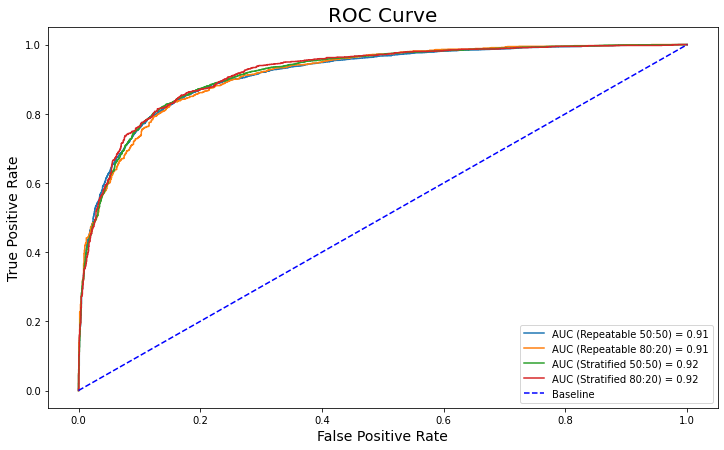

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

probs_m1 = mlp_model1.predict_proba(X_test1)[:, 1]
probs_m2 = mlp_model2.predict_proba(X_test2)[:, 1]
probs_m3 = mlp_model3.predict_proba(X_test3)[:, 1]
probs_m4 = mlp_model4.predict_proba(X_test4)[:, 1]


# y_test_int = y_test.replace({'Exited': 1, 'Not Exited': 0})
auc_mod1 = roc_auc_score(y_test1, probs_m1)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test1, probs_m1)

auc_mod2 = roc_auc_score(y_test2, probs_m2)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test2, probs_m2)

auc_mod3 = roc_auc_score(y_test3, probs_m3)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test3, probs_m3)

auc_mod4 = roc_auc_score(y_test4, probs_m4)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test4, probs_m4)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Repeatable 50:50) = {auc_mod1:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Repeatable 80:20) = {auc_mod2:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Stratified 50:50) = {auc_mod3:.2f}')
plt.plot(fpr_xg, tpr_xg, label=f'AUC (Stratified 80:20) = {auc_mod4:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();